In [1]:
from imutils import face_utils
import datetime
import argparse
import imutils
import time
import dlib
import cv2
import logging
import json
logging.disable(logging.INFO)

import matplotlib.pyplot as plt
import os
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pickle

# Data Pre-processing

## Data importing

In [2]:
# Initialize dlib's face detector (HOG-based) and then create the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [3]:
# Create prelim df with filename and target emotion class (mood)
data_path = 'dataset/'
model_path = 'trained_models/'
moods = [k for k in os.listdir(data_path) if '.' not in k]

# init vectors & coords df
data = []
for mood in moods:
    for filename in os.listdir(data_path + mood):
        data.append([filename, mood])
df = pd.DataFrame(data, columns=['filename','mood'])
df.set_index('filename', inplace=True)
df["vectors"] = [np.array([]) for k in range(df.shape[0])]
df["coords"] = [np.array([]) for k in range(df.shape[0])]
display(df.sample(10))

,mood,vectors,coords
filename,,,
Zumrati_Juma_0001.jpg,neutral,[],[]
Christina_Sawaya_0001.jpg,happiness,[],[]
S107_001_00000001.png,neutral,[],[]
Jose_Maria_Aznar_0013.jpg,neutral,[],[]
Tom_Daschle_0003.jpg,neutral,[],[]
S103_008_00000001.png,neutral,[],[]
Ludivine_Sagnier_0001.jpg,surprise,[],[]
Hans_Blix_0014.jpg,neutral,[],[]
Ali_Naimi_0002.jpg,neutral,[],[]


In [ ]:
# Functions for finding vector magnitude and direction
def mag(pointA, pointB):
    x = pointA[0] - pointB[0]
    y = pointA[1] - pointB[1]
    return math.sqrt(x*x + y*y)

# find angle between two points (-pi to pi rads)
def angle(cog, point):
    x = point[0] - cog[0]
    y = point[1] - cog[1]
    
    if not x:
        return math.pi/2 if y>0 else -math.pi/2
        
    angle = math.atan(y/x)
    if x<0 and y>0: # 2nd quadrant
        angle += math.pi
    elif x<0 and y<0: # 3rd quadrant
        angle -= math.pi
    return angle

## Feature Extraction - Vectors
The cell below takes awhile.

anger
Alejandro_Toledo_0004.jpg


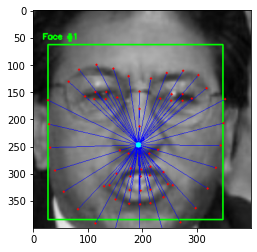

Dick_Vermeil_0002.jpg
Dileep_33.jpg
Dwarakish_106.jpg
Dwarakish_138.jpg
Dwarakish_159.jpg
Dwarakish_166.jpg
Dwarakish_72.jpg
Eric_Idle_0001.jpg
FaridaJalal_48.jpg
Felix_Mantilla_0001.jpg
Jack_Straw_0004.jpg
Jayamadhuri_126.jpg
Jayamadhuri_154.jpg
Jennifer_Capriati_0011.jpg
Jennifer_Capriati_0016.jpg
Jennifer_Capriati_0030.jpg
Julio_Rossi_0001.jpg
Kim_Clijsters_0009.jpg
Lleyton_Hewitt_0014.jpg
Manuel_Jesus_0001.jpg
Robert_Bullock_0002.jpg
Saeb_Erekat_0002.jpg
Serena_Williams_0008.jpg
SharmilaTagore_45.jpg
contempt
Arnaud_Clement_0001.jpg


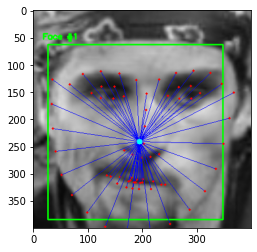

disgust
Avinash_2.jpg
Dan_LaCoutre_0001.jpg


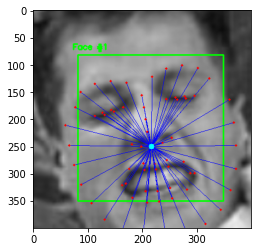

Dwarakish_1.jpg
Dwarakish_103.jpg
Dwarakish_104.jpg
Dwarakish_105.jpg
Dwarakish_111.jpg
Dwarakish_112.jpg
Dwarakish_12.jpg
Dwarakish_120.jpg
Dwarakish_121.jpg
Dwarakish_123.jpg
Dwarakish_128.jpg
Dwarakish_129.jpg
Dwarakish_141.jpg
Dwarakish_144.jpg
Dwarakish_145.jpg
Dwarakish_149.jpg
Dwarakish_151.jpg
Dwarakish_152.jpg
Dwarakish_153.jpg
Dwarakish_158.jpg
Dwarakish_160.jpg
Dwarakish_162.jpg
Dwarakish_165.jpg
Dwarakish_170.jpg
Dwarakish_171.jpg
Dwarakish_174.jpg
Dwarakish_175.jpg
Dwarakish_176.jpg
Dwarakish_177.jpg
Dwarakish_178.jpg
Dwarakish_179.jpg
Dwarakish_18.jpg
Dwarakish_180.jpg
Dwarakish_181.jpg
Dwarakish_184.jpg
Dwarakish_185.jpg
Dwarakish_189.jpg
Dwarakish_19.jpg
Dwarakish_190.jpg
Dwarakish_191.jpg
Dwarakish_198.jpg
Dwarakish_202.jpg
Dwarakish_22.jpg
Dwarakish_24.jpg
Dwarakish_25.jpg
Dwarakish_29.jpg
Dwarakish_3.jpg
Dwarakish_30.jpg
Dwarakish_32.jpg
Dwarakish_33.jpg
Dwarakish_34.jpg
Dwarakish_35.jpg
Dwarakish_36.jpg
Dwarakish_39.jpg
Dwarakish_40.jpg
Dwarakish_41.jpg
Dwarakish_42

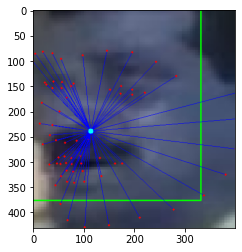

Dwarakish_14.jpg
Dwarakish_27.jpg
Dwarakish_28.jpg
Dwarakish_9.jpg
Jackie_Chan_0006.jpg
KatrinaKaif_65.jpg
Stephanie_Cohen_Aloro_0001.jpg
happiness
Aaron_Guiel_0001.jpg


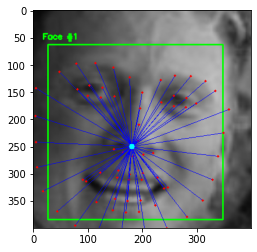

Abdoulaye_Wade_0004.jpg
Ali_Khamenei_0001.jpg
Ali_Khamenei_0002.jpg
Ali_Khamenei_0003.jpg
Andy_Roddick_0009.jpg
Angela_Bassett_0003.jpg
Angelo_Genova_0001.jpg
Annie_Chaplin_0001.jpg
Ashley_Judd_0001.jpg
Bernard_Kerik_0001.jpg
Bill_Clinton_0023.jpg
Bill_Gates_0004.jpg
Bill_OReilly_0001.jpg
Bob_Huggins_0003.jpg
Brad_Alexander_Smith_0001.jpg
Brendan_Hansen_0002.jpg
Carlos_Menem_0011.jpg
Chanda_Rubin_0004.jpg
Cherie_Blair_0001.jpg
Christina_Aguilera_0004.jpg
Chuck_Yeager_0002.jpg
Claudette_Robinson_0001.jpg
Claudia_Pechstein_0002.jpg
Cole_Chapman_0001.jpg
Colin_Powell_0160.jpg
Costas_Simitis_0002.jpg
Damon_Dash_0001.jpg
Daryl_Hannah_0002.jpg
David_Anderson_0002.jpg
David_Beckham_0009.jpg
Derek_Bond_0001.jpg
Desmon_Farmer_0001.jpg
Dick_Cheney_0010.jpg
Donald_Rumsfeld_0068.jpg
Don_Hewitt_0001.jpg
Don_King_0001.jpg
Don_Lake_0001.jpg
Dwarakish_115.jpg
Dwarakish_117.jpg
Dwarakish_132.jpg
Dwarakish_135.jpg
Dwarakish_136.jpg
Dwarakish_137.jpg
Dwarakish_139.jpg
Dwarakish_146.jpg
Dwarakish_157.jpg


Steven_Spielberg_0005.jpg
Steven_Spielberg_0007.jpg
Steve_Rush_0001.jpg
Teri_Files_0001.jpg
Terrence_Trammell_0001.jpg
Terry_McAuliffe_0001.jpg
Thabo_Mbeki_0001.jpg
Thomas_Ferguson_0001.jpg
Thor_Pedersen_0001.jpg
Tiger_Woods_0006.jpg
Tiger_Woods_0010.jpg
Tom_Cruise_0009.jpg
Tom_Glavine_0002.jpg
Tom_Watson_0002.jpg
Tony_Blair_0017.jpg
Tony_Blair_0098.jpg
Tony_Parker_0002.jpg
Uzi_Even_0001.jpg
Venus_Williams_0014.jpg
Vicente_Fernandez_0003.jpg
Vidar_Helgesen_0001.jpg
Vojislav_Seselj_0001.jpg
William_Donaldson_0001.jpg
Wilson_Alvarez_0001.jpg
Zinedine_Zidane_0004.jpg
neutral
Aaron_Eckhart_0001.jpg


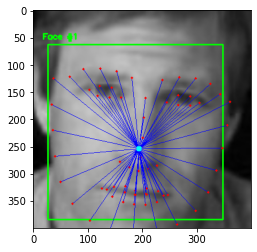

Adam_Scott_0001.jpg
Ahmad_Masood_0002.jpg
Alejandro_Atchugarry_0001.jpg
Alex_Gonzalez_0001.jpg
Alfred_Ford_0001.jpg
Ali_Abdullah_Saleh_0001.jpg
Alvaro_Uribe_0008.jpg
Al_Sharpton_0001.jpg
Amelie_Mauresmo_0021.jpg
Andrzej_Tyszkiewicz_0001.jpg
Andy_Dick_0001.jpg
Andy_North_0001.jpg
Angelica_Romero_0001.jpg
Anna_Kournikova_0007.jpg
Ariel_Sharon_0029.jpg
Ariel_Sharon_0031.jpg
Arturo_Gatti_0002.jpg
Avinash_1.jpg
Avinash_19.jpg
Avinash_27.jpg
Avinash_4.jpg
Barry_Bonds_0001.jpg
Begum_Khaleda_Zia_0001.jpg
Bill_Clinton_0022.jpg
Bill_Sizemore_0001.jpg
Binyamin_Ben-Eliezer_0001.jpg
Bobo_Balde_0001.jpg
Bob_Curtis_0001.jpg
Bono_0003.jpg
Boris_Becker_0003.jpg
Brandon_Webb_0001.jpg
Brawley_King_0001.jpg
Brian_Florence_0001.jpg
Brian_Heidik_0001.jpg
Calvin_Joseph_Coleman_0001.jpg
Carla_Del_Ponte_0004.jpg
Carlos_Moya_0003.jpg
Carlos_Moya_0006.jpg
Cathryn_Crawford_0001.jpg
Cathy_Freeman_0002.jpg
Chan_Gailey_0002.jpg
Chan_Ho_Park_0001.jpg
Charles_Moose_0009.jpg
Charles_Rogers_0001.jpg
Chris_Andrews_0001.j

Paul_ONeill_0003.jpg
Paul_Sarbanes_0002.jpg
Pedro_Mahecha_0001.jpg
Pete_Sampras_0018.jpg
Philippe_Noiret_0002.jpg
Pierce_Brosnan_0009.jpg
Princess_Aiko_0001.jpg
Qazi_Hussain_Ahmed_0001.jpg
Queen_Elizabeth_II_0006.jpg
Queen_Elizabeth_II_0008.jpg
Rainer_Schuettler_0001.jpg
Ralf_Schumacher_0006.jpg
Ralf_Schumacher_0007.jpg
Ray_Allen_0001.jpg
Recep_Tayyip_Erdogan_0026.jpg
Reggie_Miller_0002.jpg
Ricardo_Lagos_0004.jpg
Richard_Butler_0002.jpg
Richard_Krajicek_0001.jpg
Richard_Myers_0003.jpg
Roberto_Carlos_0003.jpg
Roberto_Cercelletta_0001.jpg
Robert_Lee_Yates_Jr_0001.jpg
Rod_Jong-il_0001.jpg
Roger_Cook_0001.jpg
Roger_King_0001.jpg
Roger_Penske_0001.jpg
Romano_Prodi_0005.jpg
Roman_Abramovich_0001.jpg
Rudolph_Giuliani_0003.jpg
Rudolph_Giuliani_0007.jpg
Rudolph_Giuliani_0012.jpg
Rupert_Murdoch_0002.jpg
Saddam_Hussein_0010.jpg
Saddam_Hussein_0018.jpg
Saddam_Hussein_0021.jpg
Sam_Bith_0003.jpg
Sananda_Maitreya_0001.jpg
Scott_Sullivan_0001.jpg
Sean_Patrick_OMalley_0003.jpg
Shane_Reynolds_0001.jpg
S

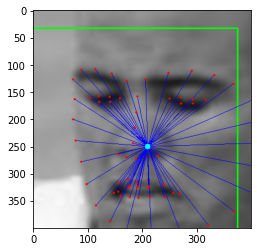

Armando_Carrillo_0001.jpg
Avinash_10.jpg
Avinash_12.jpg
Avinash_13.jpg
Avinash_14.jpg
Avinash_15.jpg
Avinash_16.jpg
Avinash_20.jpg
Avinash_21.jpg
Avinash_22.jpg
Avinash_23.jpg
Avinash_25.jpg
Avinash_26.jpg
Avinash_3.jpg
Avinash_6.jpg
Avinash_7.jpg
Avinash_8.jpg
Avinash_9.jpg
Beth_Jones_0002.jpg
Boris_Becker_0002.jpg
Charlotte_Chambers_0001.jpg
Dileep_110.jpg
Dileep_111.jpg
Dileep_13.jpg
Dileep_14.jpg
Dileep_41.jpg
Dileep_50.jpg
Dileep_56.jpg
Dwarakish_10.jpg
Dwarakish_101.jpg
Dwarakish_102.jpg
Dwarakish_11.jpg
Dwarakish_113.jpg
Dwarakish_114.jpg
Dwarakish_13.jpg
Dwarakish_131.jpg
Dwarakish_133.jpg
Dwarakish_134.jpg
Dwarakish_154.jpg
Dwarakish_182.jpg
Dwarakish_197.jpg
Dwarakish_199.jpg
Dwarakish_2.jpg
Dwarakish_200.jpg
Dwarakish_75.jpg
Dwarakish_78.jpg
Dwarakish_79.jpg
Dwarakish_8.jpg
Dwarakish_81.jpg
Dwarakish_85.jpg
Dwarakish_86.jpg
Dwarakish_89.jpg
Dwarakish_99.jpg
FaridaJalal_88.jpg
George_W_Bush_0132.jpg
Hitomi_Soga_0001.jpg
HrithikRoshan_173.jpg
HrithikRoshan_174.jpg
HrithikRosha

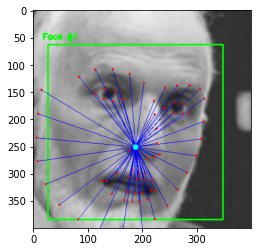

Allen_Iverson_0001.jpg
Atal_Bihari_Vajpayee_0021.jpg
Avinash_30.jpg
Dileep_17.jpg
Dileep_36.jpg
Dileep_38.jpg
Dileep_47.jpg
Dileep_48.jpg
George_W_Bush_0056.jpg
HrithikRoshan_149.jpg
HrithikRoshan_188.jpg
HrithikRoshan_201.jpg
Jaouad_Gharib_0001.jpg
Javier_Vazquez_0001.jpg
Jennifer_Capriati_0037.jpg
Keith_Lowen_0001.jpg
Lisa_Stone_0001.jpg
Luis_Horna_0002.jpg
Matt_Doherty_0002.jpg
Matt_Doherty_0003.jpg
Mike_Weir_0003.jpg
Monica_Seles_0001.jpg
Mukesh_Ambani_0002.jpg
Paradorn_Srichaphan_0009.jpg
Richard_Gephardt_0010.jpg
Rick_Pitino_0004.jpg
Roberto_Laratro_0001.jpg
Rubens_Barrichello_0012.jpg


In [19]:
# Populate df with (reshaped) vector data
features = {}
for mood in moods:
    features[mood] = []
    print(mood)
    show = True # show only the first image of each emotion
    for filename in os.listdir(data_path + mood):
        path = data_path + mood + '/' + filename
        vectors = [] # list of vectors
        coords = [] # list of coordinates of facial landmarks (offset by cog)
        
        # load the input image, resize it, and convert it to grayscale
        image = cv2.imread(path)
        image = imutils.resize(image, width=400)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray = cv2.equalizeHist(gray)

        # detect faces in the grayscale image
        rects = detector(gray, 1)
        
        if not len(rects):
            print(filename)
            df.drop(index=filename)
            continue            

        # loop over the face detections (multiple faces)
        for (i, rect) in enumerate(rects):
            shape = predictor(gray, rect) # determine facial landmarks for face region
            shape = face_utils.shape_to_np(shape) # convert the facial landmark (x,y)-coordinates to a Numpy array

            if show:
                (x,y,w,h) = face_utils.rect_to_bb(rect) # convert dlib's rectangle to a OpenCV-style bounding box [i.e., (x,y,w,h)]
                cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 2) # draw the face bounding box
                cv2.putText(image, "Face #{}".format(i+1), (x-10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2) # show face number
            
            cog = tuple(shape.mean(axis=0).astype(int)) # get center of gravity (COG)            

            # draw (x,y)-coordinates for the facial landmarks on image
            for (x,y) in shape:
                if show:
                    cv2.line(image, (x,y), cog, (0,0,255), 1) # draw vector lines
                    cv2.circle(image, (x,y), 2, (255,0,0), -1) # image, center-coords, radius, colour, thickness(fill)
                vectors.append([mag(cog, (x,y)), angle(cog, (x,y))]) # get vector magnitude and direction                
                coords.append([x-cog[0], y-cog[1]]) # append coordinates relative to cog
            if show:
                cv2.circle(image, cog, 5, (0,255,255), -1)

        # show the output image with the face detections + facial landmarks
        if show:
            print(filename)
            plt.imshow(image) # adapted for jupyter
            plt.show()            
        
        # store inputs in dataset
        vectors = np.array(vectors)        
        scale_factor = 1 / max(vectors[:,0])
        vectors[:,0] = vectors[:,0] * scale_factor # normalize magnitudes
        vectors = vectors[:,0] * vectors[:,1]
        df.loc[filename, 'vectors'] = vectors
    
        coords = np.array(coords) * scale_factor
        coords = coords.reshape(-1)
        df.loc[filename, 'coords'] = coords
        
        show = False
        

In [20]:
df.sample(5)

,mood,vectors,coords
filename,,,
Jayamadhuri_22.jpg,happiness,"[-1.7769437626403295, -1.776118204179334, 1.80...","[-0.5885376591893069, -0.3347307936639183, -0...."
Tommy_Lewis_0001.jpg,neutral,"[-2.51374284048388, -2.496468935439684, -2.569...","[-0.8176481115713897, -0.552464940250939, -0.8..."
Albert_Brooks_0001.jpg,happiness,"[-2.1604635974218054, -2.1501803551984784, -0....","[-0.7166341693342245, -0.39986109448358903, -0..."
Gary_Sayler_0001.jpg,neutral,"[-2.702811172582095, -2.6330717020793117, 2.50...","[-0.9083921176752494, -0.37625709016134595, -0..."
Tanya_Holyk_0001.jpg,happiness,"[-2.51498854488306, -2.4546417236746803, -2.48...","[-0.8100235169072897, -0.5863973926077312, -0...."


In [21]:
# Filter df
indexNames = df[(df.vectors.str.len().eq(0)) | (df.coords.str.len().eq(0))].index 
indexNames = list(indexNames)
for index,row in df.iterrows():
    if len(row['vectors']) != 68:
        indexNames.append(index)
print(len(indexNames))
df.drop(indexNames , inplace=True)

# Save df with vectors and coords to CSV
df['vectors'] = df['vectors'].apply(lambda x:list(x)).apply(json.dumps)
df['coords'] = df['coords'].apply(lambda x:list(x)).apply(json.dumps)
df.to_csv(data_path + 'df_vector_coods.csv')

## Feature extraction - Cropped Faces

anger
Alejandro_Toledo_0004.jpg


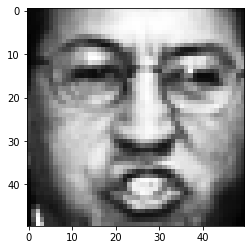

contempt
Derek_Jeter_0002.jpg


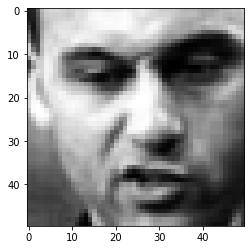

disgust
David_Nalbandian_0006.jpg


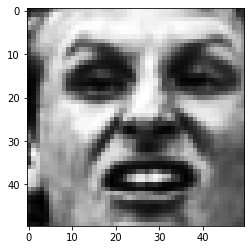

fear
Dwarakish_195.jpg


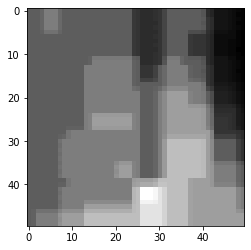

happiness
Aaron_Peirsol_0001.jpg


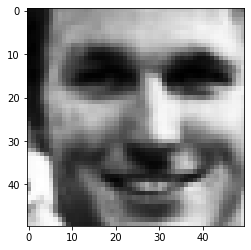

neutral
Aaron_Patterson_0001.jpg


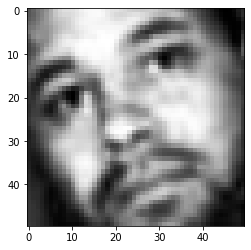

sadness
Alessandra_Cerna_0001.jpg


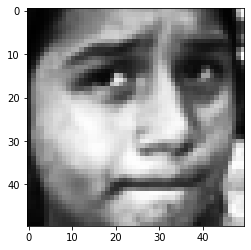

surprise
Adam_Mair_0001.jpg


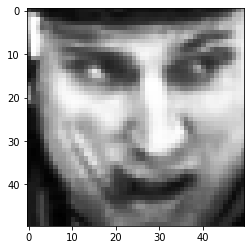

Time taken: 32m33s.


In [4]:
dim = 50
cropped_dataset, cropped_target = [], [] # dataset.shape=(num_datapoints, 100, 100)
brk = False
lst = []
start = time.time()
for mood in moods:
    print(mood)
    show = True # show only the first image of each emotion
    for filename in os.listdir(data_path + mood):
        path = data_path + mood + '/' + filename
        
        try:
            # load the input image, resize it, and convert it to grayscale
            image = cv2.imread(path)
            image = imutils.resize(image, width=400)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # detect faces in the grayscale image
            rects = detector(gray, 1)

            # loop over the face detections (multiple faces)
            for (i, rect) in enumerate(rects):
                # determine the facial landmarks for the face region, then
                # convert the facial landmark (x,y)-coordinates to a NumPy array
                shape = predictor(gray, rect)
                shape = face_utils.shape_to_np(shape) 

                # convert dlib's rectangle to a OpenCV-style bounding box
                # [i.e., (x, y, w, h)], then draw the face bounding box
                (x,y,w,h) = face_utils.rect_to_bb(rect)
                cropped_image = image[y:y+h, x:x+w]
                cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2GRAY)
                cropped_image = cv2.equalizeHist(cropped_image)

            # resize and square-crop cropped face
            cropped_image = imutils.resize(cropped_image, width=int(dim*1.05)) # buffer for cropping
            cropped_image = cropped_image[:dim,:dim]
            if cropped_image.shape[0]!=dim or cropped_image.shape[1]!=dim:
                raise Exception()
#                 print(filename, cropped_image.shape)
        
            # show the output image with the face detections + facial landmarks
            if show:
                print(filename)
                plt.imshow(cropped_image, cmap='gray') # adapted for jupyter
                plt.show()

            show = False

        except:
            print('[ERROR]', filename)
            lst.append((mood, filename))
            
        # add to dataset
        cropped_dataset.append(cropped_image)
        cropped_target.append(mood)
            
end = time.time()
tt = end - start
print("Time taken: %dm%ds." % (tt//60, tt%60))
cropped_dataset = np.array(cropped_dataset)
cropped_target = np.array(cropped_target)

In [5]:
for (m,f) in lst:
    print(m + '/' + f)

In [8]:
# Save image graylevels arrays
with open(data_path + 'graylevels_data.npy', 'wb') as f:
    np.save(f, cropped_dataset)
    np.save(f, cropped_target)